### Random Foreset Regression

#### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import dataset

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Separate X features & y labels

In [3]:
X = df.drop('sales', axis=1).values
y = df['sales'].values

In [4]:
X[0], y[0]

(array([230.1,  37.8,  69.2]), 22.1)

#### Split dataset into Training and Test

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Train the model on Training set

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

#### Test the model on Test set

In [7]:
y_pred = regressor.predict(X_test)
#np.set_printoptions(precision=2)

In [8]:
new_df = pd.DataFrame({ 'y_pred': y_pred.round(1),    'y_test': y_test})

new_df.head()

,y_pred,y_test
0,10.6,11.3
1,9.8,8.4
2,9.6,8.7
3,25.2,25.4
4,12.9,11.7


#### Evaluate the model

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Metrics to validate how good the model is

mae = mean_absolute_error(new_df['y_test'], new_df['y_pred']).round(15)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(new_df['y_test'], new_df['y_pred']).round(5)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse).round(5)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(new_df['y_test'], new_df['y_pred']).round(7)
print(f"R-squared: {r2}")

n = X.shape[0]
k = X.shape[1]
r2_adj = round((1 - (1 - r2) * (n - 1) / (n - k - 1)),7)
print(f"R-squared adjusted: {r2_adj}")

Mean Absolute Error (MAE): 0.755
Mean Squared Error (MSE): 1.002
Root Mean Squared Error (RMSE): 1.001
R-squared: 0.9681596
R-squared adjusted: 0.9676722


#### Visual

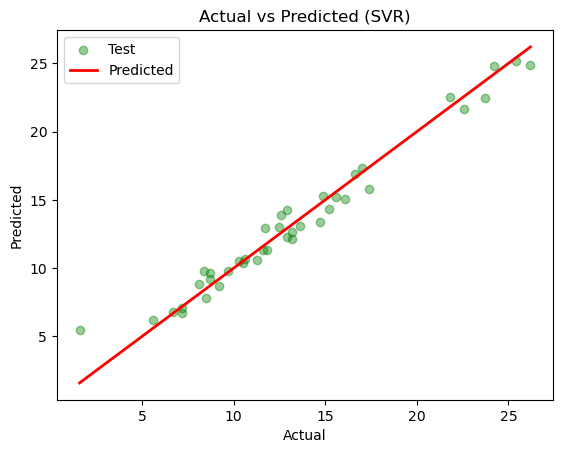

In [10]:
plt.scatter(y_test, y_pred, color='green', label='Test', alpha = 0.4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (SVR)')
plt.legend()
plt.show()

#### Predict future sales

In [11]:
# Predict new spending amounts
spending = {'TV': 160, 'radio': 30, 'newspaper': 20}
predicted_sales = regressor.predict([[spending['TV'], spending['radio'], spending['newspaper']]])
predicted_sales

array([16.85])

###### If we spend 150 dollars on TV, 30 on radio and 20 on newspaper, we will generate 16.85 dollars. 
###### terrific!